In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

In [2]:
import torch
from models.resnet import ResNet

backbone = ResNet(
    depth=50,
    num_stages=4,
    out_indices=(0, 1, 2, 3, ),
    style='pytorch')

backbone_state_dict = torch.load('../models/backbone.pth')
backbone.load_state_dict(backbone_state_dict)

<All keys matched successfully>

In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

In [10]:
from escnn import gspaces
from models.patchnet_equivariant import Discrete_Quad_L2Net_ConfCFS
from models.steerable_l2 import SteerableL2

r2_act = gspaces.rot2dOnR2(8)
fourier = False
# model = SteerableL2(r2_act, fourier=fourier).to('cuda')
model = Discrete_Quad_L2Net_ConfCFS(r2_act, fourier=fourier, num_rotations=8).to('cuda')

Running for C8!
Discrete_Quad_L2Net_ConfCFS(
  (block1): SequentialModule(
    (0): R2Conv([C8_on_R2[(None, 8)]: {irrep_0 (x3)}(3)], [C8_on_R2[(None, 8)]: {regular (x16)}(128)], kernel_size=3, stride=1, padding=1)
    (1): IIDBatchNorm2d([C8_on_R2[(None, 8)]: {regular (x16)}(128)], eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU(inplace=True, type=[C8_on_R2[(None, 8)]: {regular (x16)}(128)])
  )
  (block2): SequentialModule(
    (0): R2Conv([C8_on_R2[(None, 8)]: {regular (x16)}(128)], [C8_on_R2[(None, 8)]: {regular (x16)}(128)], kernel_size=3, stride=1, padding=1)
    (1): IIDBatchNorm2d([C8_on_R2[(None, 8)]: {regular (x16)}(128)], eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU(inplace=True, type=[C8_on_R2[(None, 8)]: {regular (x16)}(128)])
  )
  (block_extra): SequentialModule(
    (0): R2Conv([C8_on_R2[(None, 8)]: {regular (x16)}(128)], [C8_on_R2[(None, 8)]: {regular (x16)}(128)], kernel_size=3, stride=1, padding=1)
    (

In [13]:
import torch
model.load_state_dict(torch.load('../models/finalmodelC8_epoch_1_4x16_1x32_1x64_2x128.pt')['state_dict'], strict=False)

_IncompatibleKeys(missing_keys=['block1.0.expanded_bias', 'block1.0.filter', 'block2.0.expanded_bias', 'block2.0.filter', 'block_extra.0.expanded_bias', 'block_extra.0.filter', 'block3.0.expanded_bias', 'block3.0.filter', 'block5.0.expanded_bias', 'block5.0.filter', 'block6.0.expanded_bias', 'block6.0.filter', 'block7.0.expanded_bias', 'block7.0.filter', 'block8.0.expanded_bias', 'block8.0.filter', 'invariant_map.filter'], unexpected_keys=[])

In [19]:
x = torch.zeros((1, 3, 512, 512))
x = x.to('cuda')

with torch.no_grad():
    res = model(imgs=[x])

In [23]:
res['descriptors'][0].shape

torch.Size([1, 128, 512, 512])

In [26]:
from escnn import nn
r2_act = gspaces.rot2dOnR2(8)
in_type = nn.FieldType(r2_act, [r2_act.trivial_repr]*3)
mask = nn.MaskModule(in_type, 29, margin=1)

In [28]:
x = torch.ones((1, 3, 512, 512))
x = nn.GeometricTensor(x, in_type)
y = mask(x)

AssertionError: 

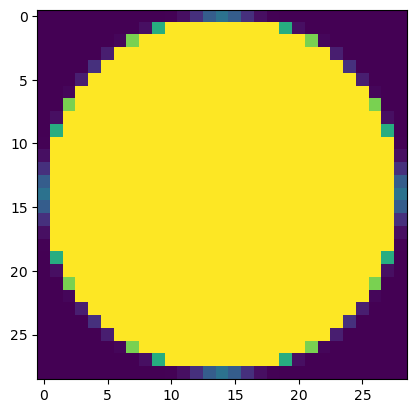

In [33]:
import matplotlib.pyplot as plt
plt.imshow(mask.mask[0, 0].cpu().numpy())